# DASL Challenge 3 TEAM 2 Submission

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

### Importing the data we'll be using

In [16]:
df=pd.read_csv("foodhub-order.csv")

### Understanding the structure of the data

In [17]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


### **Question 1:** How many rows and columns are present in the data?

There are one thousand, eight hundred and ninety-eight(1898) rows, starting from 0 
and nine(9) columns present in the data set imported

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


According to the information gained from the info() function, there are 3 different data types
1. integer
2. String or object
3. float

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. 

In [19]:
df.isnull().values.any()

False

Using the isnull() function it can be deduced that there are no missing values in the data

In [20]:
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

However, upon looking at the restaurant names it was evident that some names contained non printable characters as evidenced by the output above.

To solve this, the code snippet below was used

In [21]:
df['restaurant_name']= df['restaurant_name'].str.encode('ascii', 'ignore').str.decode('ascii')

In [22]:
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill', 'Big Wong Restaurant _',
       'Empanada Mama (closed)', 'Pylos', "Lucky's Famous Burgers",
       'Shake Shack', 'Sushi of Gari', 'RedFarm Hudson',
       'Blue Ribbon Sushi', 'Five Guys Burgers and Fries', 'Tortaria',
       'Cafe Mogador', 'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Brooklyn', 'Nobu 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [23]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


According to the data provided by the describe() function, we can see that
1. The quickest time for food preparation i.e minimum is 20 minutes
2. Average time for food preparation is around 27 minutes
3. The slowest time for food preparation i.e maximum is 35 minutes

### **Question 5:** How many orders are not rated? 

In [24]:
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

736 orders were unrated by the customers

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

#### Order ID

In [26]:
orders = df['order_id'].nunique()
print('We have {} unique orders in our dataset'.format(orders))

We have 1898 unique orders in our dataset


#### Customer ID

In [27]:
customers = df['customer_id'].nunique()
print(f'There are different {customers} customers in the dataset')

There are different 1200 customers in the dataset


#### Restaurant name

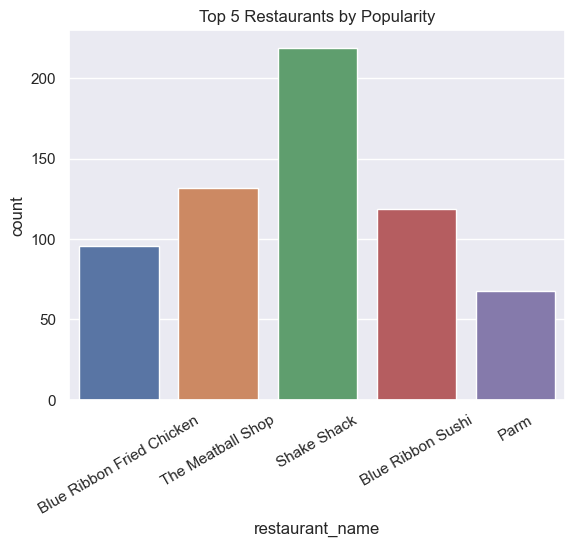

In [31]:
top_five = df['restaurant_name'].value_counts().nlargest(5)
top_five_df = df[df['restaurant_name'].isin(top_five.index)]
sns.countplot(x =top_five_df['restaurant_name'])
plt.xticks(rotation=30)
plt.title('Top 5 Restaurants by Popularity')
plt.show()

Based off our visualisation we can see the top 5 restaurants our customers love to order from with Shake Shack being the most popular

#### Cuisine type

In [32]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

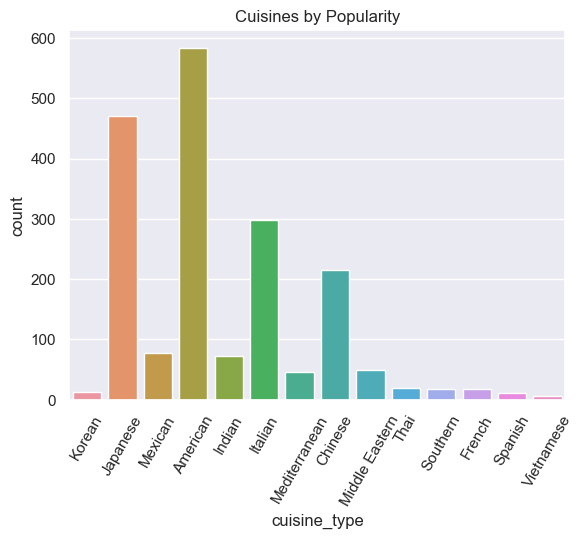

In [72]:
cuisines = df['cuisine_type'].value_counts().nlargest(14)
cuisines_df = df[df['cuisine_type'].isin(cuisines.index)]
sns.countplot(x =cuisines_df['cuisine_type'])
plt.xticks(rotation=60)
plt.title('Cuisines by Popularity')
plt.show()

We can see that there are 14 different cuisine types and that American cuisine is the most popular

#### Cost of the order

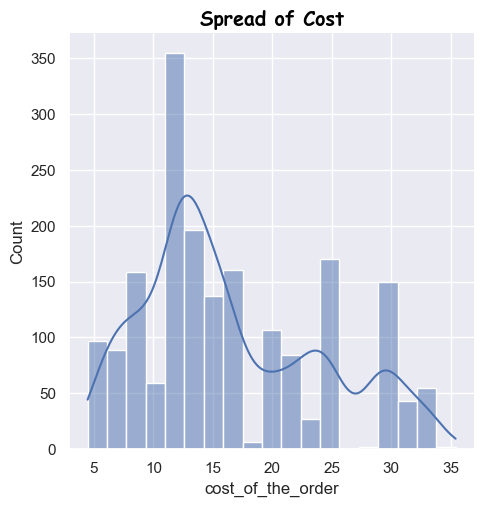

In [118]:
cost = df['cost_of_the_order']
sns.displot(df['cost_of_the_order'],kde=True)
plt.title('Spread of Cost',color='black',weight='heavy',font='cursive', size = 14)
plt.show()

From the above visualisation, the average FoodHub order cost is about 16 dollars. Whereas, the majority of the FoodHub order cost ranges from 11 to 13 dollars.

#### Day of the week

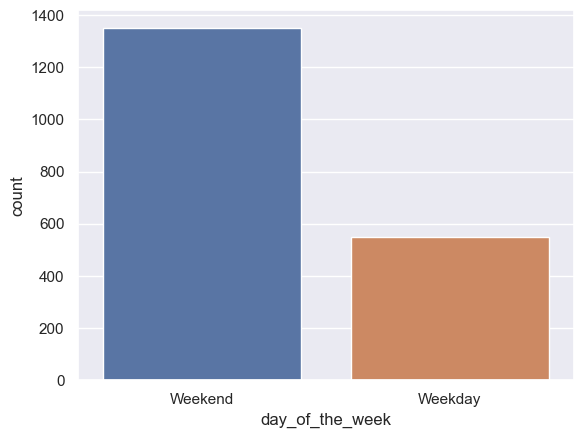

In [54]:
sns.countplot(x='day_of_the_week',data=df)
plt.show()

Majority of the orders are placed on Weekends

#### Rating

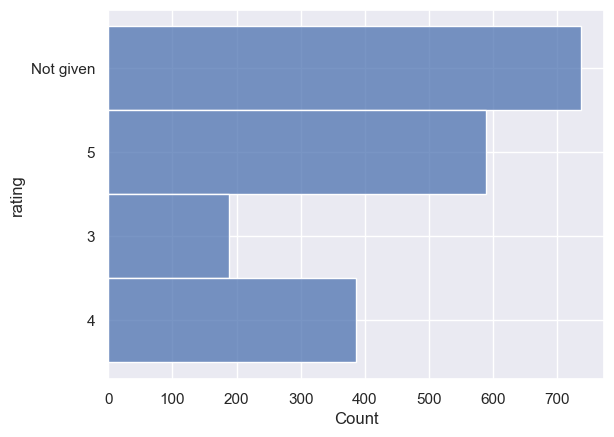

In [52]:
sns.histplot(y=df['rating'])
plt.show()

Most of the customers placed orders and gave no rating. However, orders that do have ratings range from 3-5 stars with the majority of customers giving a 5 star rating.

#### Food Preparation time

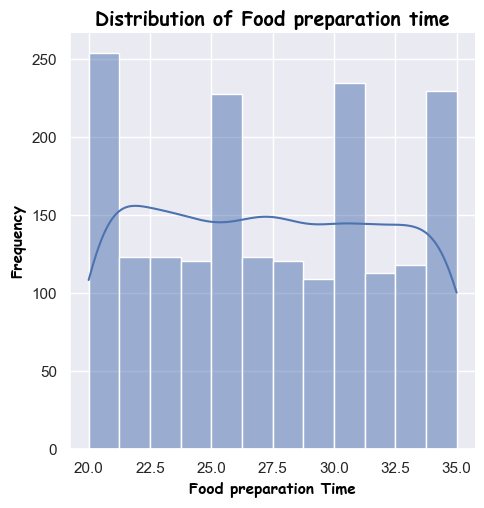

In [117]:
sns.displot(x=df['food_preparation_time'], kde=True)
plt.title('Distribution of Food preparation time',color='black',weight='heavy',font='cursive', size = 14)
plt.xlabel('Food preparation Time',color='black',weight='heavy',font='cursive', size = 11)
plt.ylabel('Frequency',color='black',weight='heavy',font='cursive', size = 11)
plt.show()

It can be observed that food preparation time seems to follow a normal distribution with a minimum time of 20 minutes and maximum time of 35 minutes. The average food preparation time is at about 27 minutes. However, the distribution does not have a well defined bell curve with a sharp peak.

#### Delivery time

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


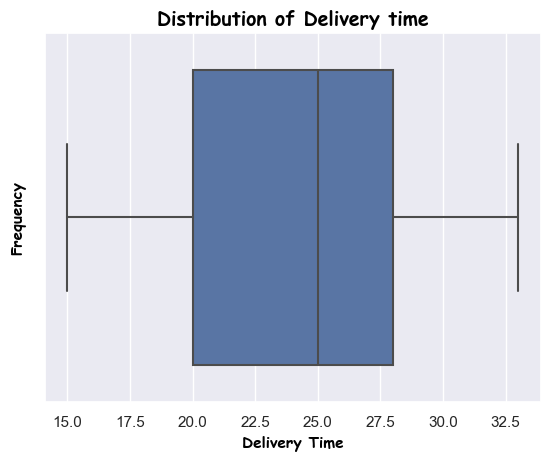

In [116]:
sns.boxplot(df['delivery_time'])
plt.title('Distribution of Delivery time',color='black',weight='heavy',font='cursive', size = 14)
plt.xlabel('Delivery Time',color='black',weight='heavy',font='cursive', size = 11)
plt.ylabel('Frequency',color='black',weight='heavy',font='cursive', size = 11)
plt.show()

From the distribution its evident that the quickest delivery time is about 20 minutes and the slowest is about 28 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

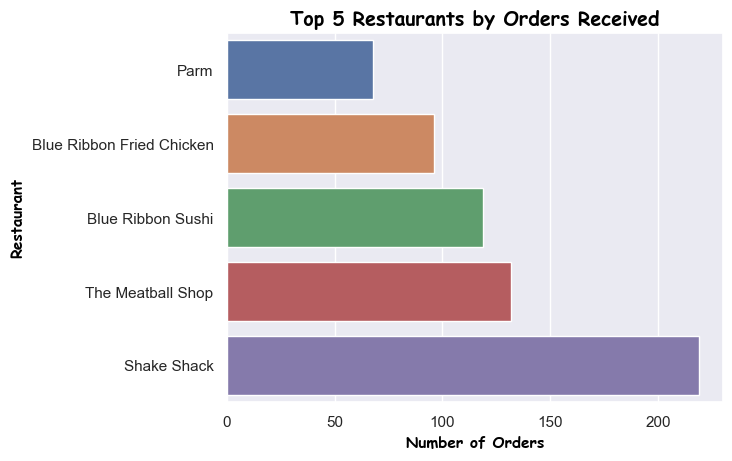

In [115]:
top5 = df.groupby('restaurant_name')['order_id'].nunique().sort_values().tail(5).reset_index()
sns.barplot(data=top5, y = 'restaurant_name', x = 'order_id')
plt.title('Top 5 Restaurants by Orders Received',color='black',weight='heavy',font='cursive', size = 14)
plt.xlabel('Number of Orders',color='black',weight='heavy',font='cursive', size = 11)
plt.ylabel('Restaurant',color='black',weight='heavy',font='cursive', size = 11)
plt.show()

### **Question 8**: Which is the most popular cuisine on weekends?

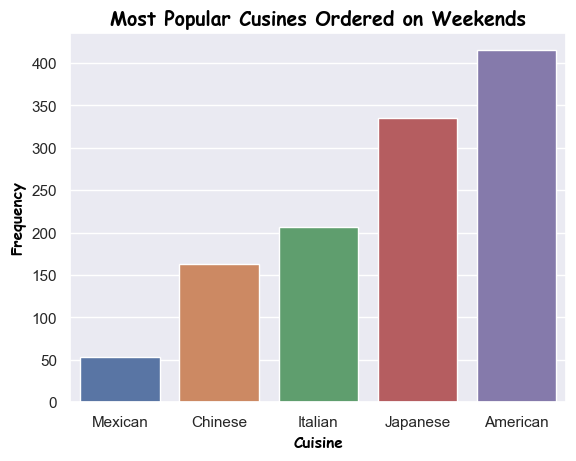

In [114]:
weekends = df[df['day_of_the_week']=='Weekend']

weekend_cuisine = weekends['cuisine_type'].value_counts().nlargest(5)
weekend_cuisine_df = weekends[weekends['cuisine_type'].isin(cuisine.index)]

sns.countplot(x = weekend_cuisine_df['cuisine_type'],order=cuisine_df['cuisine_type'].value_counts(ascending=True).index)
plt.title('Most Popular Cusines Ordered on Weekends',color='black',weight='heavy',font='cursive', size = 14)
plt.ylabel('Frequency',color='black',weight='heavy',font='cursive', size = 11)
plt.xlabel('Cuisine',color='black',weight='heavy',font='cursive', size = 11)
plt.show()

### **Question 9**: What percentage of the orders cost more than 20 dollars?

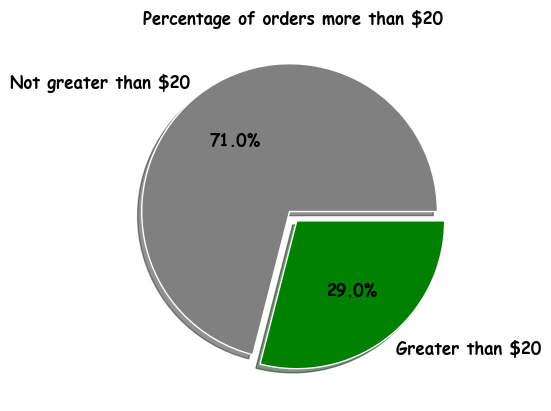

In [90]:
empty = []

for i in df['cost_of_the_order']:
    if i > 20:
        empty.append('Greater than $20')
    else:
        empty.append('Not greater than $20')
df['is_greater_than_twenty_dollars'] = empty

pie = df['is_greater_than_twenty_dollars'].value_counts(normalize=True).round(2)

plt.pie(x=pie,labels=pie.index, explode=[0.04,0.04], autopct = '%0.1f%%',shadow = True, colors=['grey', 'green'],textprops={'color':'black','weight':'heavy','font':'cursive','size':12})
plt.title('Percentage of orders more than $20', color='black',weight='heavy',font='cursive', size = 12)
plt.show()

### **Question 10**: What is the mean order delivery time?

In [92]:
avg = round(df['delivery_time'].mean(),2)
print(f'The mean order delivery time is {avg} minutes')

The mean order delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

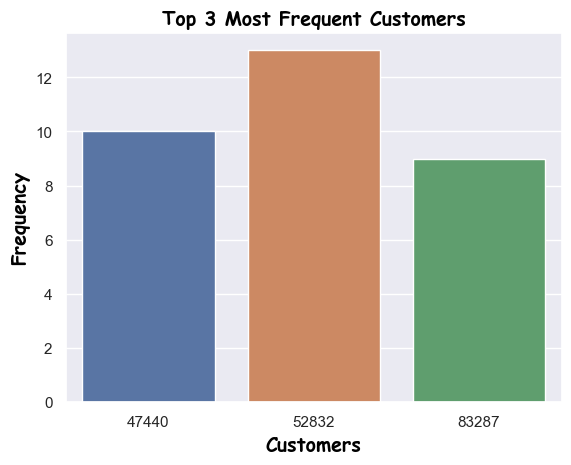

In [113]:
customers = df['customer_id'].value_counts().nlargest(3).reset_index()
customers = customers.rename(columns={'index':'customer_id','customer_id':'frequency'})
sns.barplot(data=customers,x="customer_id",y='frequency')
plt.xlabel('Customers',color='black',weight='heavy',font='cursive', size = 14)
plt.ylabel('Frequency',color='black',weight='heavy',font='cursive', size = 14)
plt.title('Top 3 Most Frequent Customers',color='black',weight='heavy',font='cursive', size = 14)
plt.show()

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

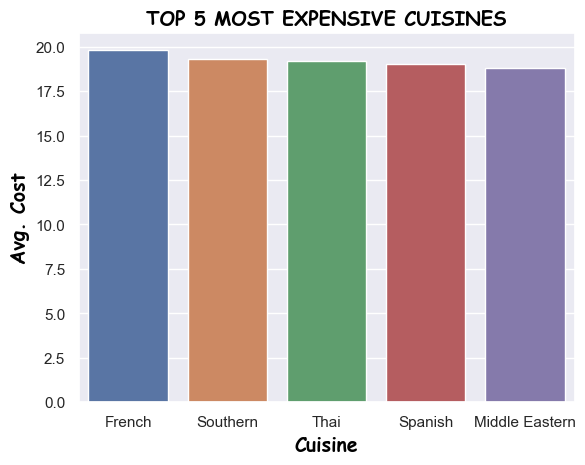

In [111]:
grouped_df = df.groupby('cuisine_type')['cost_of_the_order'].mean().reset_index().nlargest(5,'cost_of_the_order')
sns.barplot(data=grouped_df,x='cuisine_type',y='cost_of_the_order')
plt.title('TOP 5 MOST EXPENSIVE CUISINES',color='black',weight='heavy',font='cursive', size = 14)
plt.xlabel('Cuisine',color='black',weight='heavy',font='cursive', size = 14)
plt.ylabel('Avg. Cost',color='black',weight='heavy',font='cursive', size = 14)
plt.show()

#### Cuisine vs Food Preparation time

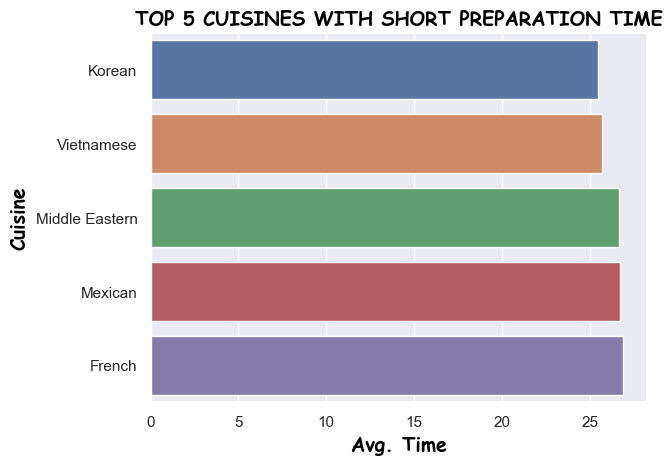

In [110]:
grouped_df = df.groupby('cuisine_type')['food_preparation_time'].mean().reset_index().nsmallest(5,'food_preparation_time')
sns.barplot(data=grouped_df,y='cuisine_type',x='food_preparation_time')
plt.title('TOP 5 CUISINES WITH SHORT PREPARATION TIME',color='black',weight='heavy',font='cursive', size = 14)
plt.ylabel('Cuisine',color='black',weight='heavy',font='cursive', size = 14)
plt.xlabel('Avg. Time',color='black',weight='heavy',font='cursive', size = 14)
plt.show()

#### Day of the Week vs Delivery time

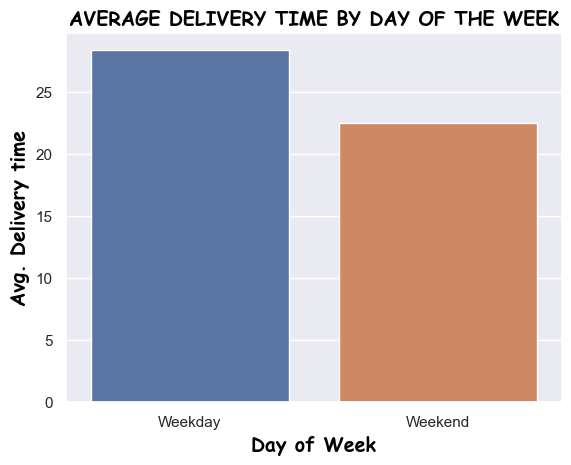

In [109]:
grouped_df = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()
sns.barplot(data=grouped_df,x='day_of_the_week',y='delivery_time')
plt.title('AVERAGE DELIVERY TIME BY DAY OF THE WEEK',color='black',weight='heavy',font='cursive', size = 14)
plt.xlabel('Day of Week',color='black',weight='heavy',font='cursive', size = 14)
plt.ylabel('Avg. Delivery time',color='black',weight='heavy',font='cursive', size = 14)
plt.show()

#### Day of the Week vs Food Preparation time

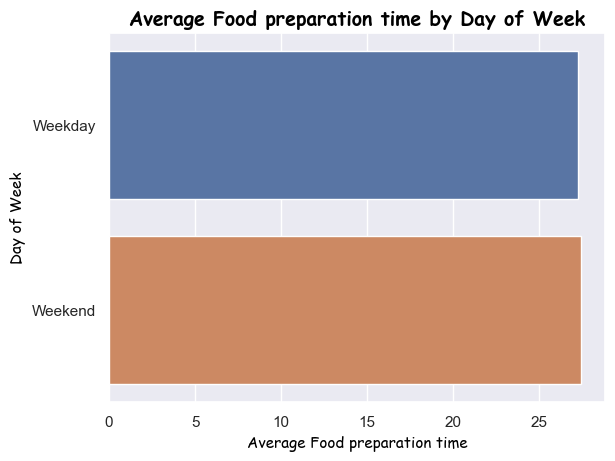

In [123]:
grouped_df = df.groupby('day_of_the_week')['food_preparation_time'].mean().reset_index()
sns.barplot(data=grouped_df,y='day_of_the_week',x='food_preparation_time')
plt.title('Average Food preparation time by Day of Week',color='black',weight='heavy',font='cursive', size = 14)
plt.ylabel('Day of Week',color='black',font='cursive', size = 11)
plt.xlabel('Average Food preparation time',color='black',font='cursive', size = 11)
plt.show()

#### Rating vs Delivery time

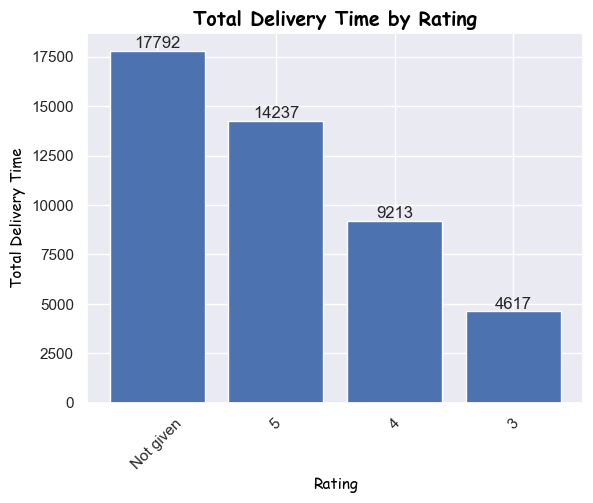

In [125]:
# Group the DataFrame by 'rating'
rate_aganist_deli_grp = df.groupby('rating')

# Calculate the sum of 'delivery_time' for each rating category and sort the values in descending order
sorted_rate_aganist_deli_grp = rate_aganist_deli_grp['delivery_time'].sum().sort_values(ascending=False)

# Create a bar plot using the sorted rating groups
plt.bar(sorted_rate_aganist_deli_grp.index, sorted_rate_aganist_deli_grp.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Data labels
for i, value in enumerate(sorted_rate_aganist_deli_grp.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Total Delivery Time by Rating',color='black',weight='heavy',font='cursive', size = 14)
plt.xlabel('Rating',color='black',font='cursive', size = 11)
plt.ylabel('Total Delivery Time',color='black',font='cursive', size = 11)

# Display the plot
plt.show()

#### Rating vs Cost of the order

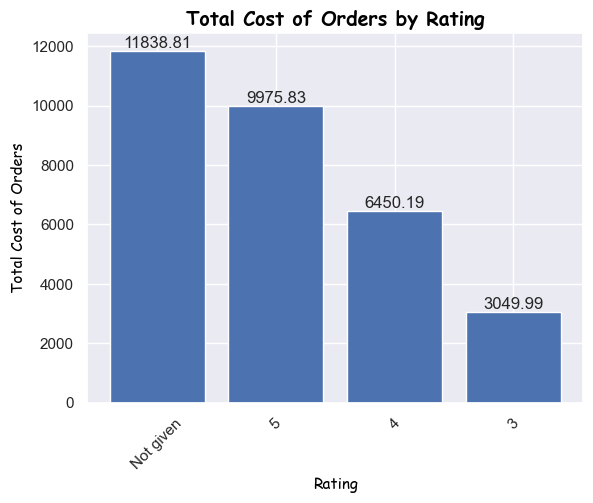

In [126]:
# Group the DataFrame by 'rating'
rate_aganist_coo_grp = df.groupby('rating')

# Calculate the sum of 'cost_of_the_order' for each rating category and sort the values in descending order
sorted_rate_aganist_coo_grp = rate_aganist_coo_grp['cost_of_the_order'].sum().sort_values(ascending=False)

# Create a bar plot using the sorted rating groups
plt.bar(sorted_rate_aganist_coo_grp.index, sorted_rate_aganist_coo_grp.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Data labels
for i, value in enumerate(sorted_rate_aganist_coo_grp.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Total Cost of Orders by Rating',color='black',weight='heavy',font='cursive', size = 14)
plt.xlabel('Rating',color='black',font='cursive', size = 11)
plt.ylabel('Total Cost of Orders',color='black',font='cursive', size = 11)

# Display the plot
plt.show()

#### Correlation among variables

Correlation coefficient: 0.04152747282774476


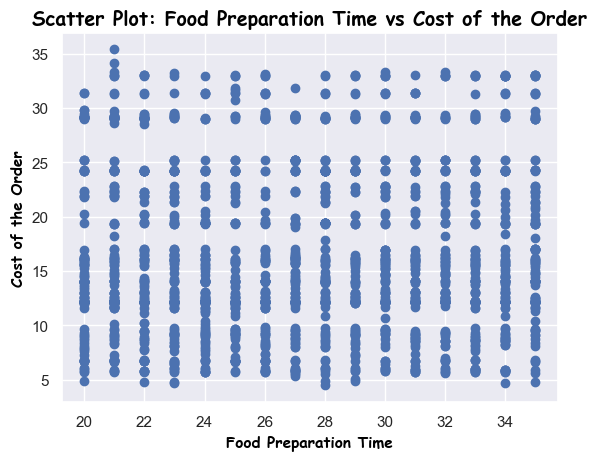

In [129]:
correlation = df['cost_of_the_order'].corr(df['food_preparation_time'])
print("Correlation coefficient:", correlation)

plt.scatter(df['food_preparation_time'], df['cost_of_the_order'])
plt.xlabel('Food Preparation Time',color='black',weight='heavy',font='cursive', size = 11)
plt.ylabel('Cost of the Order',color='black',weight='heavy',font='cursive', size = 11)
plt.title('Scatter Plot: Food Preparation Time vs Cost of the Order',color='black',weight='heavy',font='cursive', size = 14)
plt.show()

There is no correlation between the food preparation time and the cost of the order variables

Correlation coefficient: -0.0299491849006488


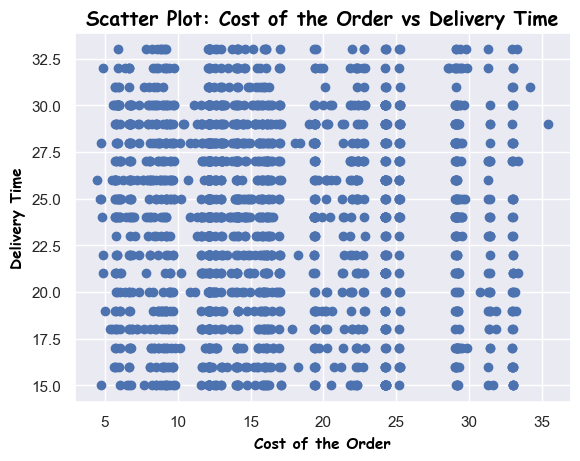

In [130]:
correlation = df['cost_of_the_order'].corr(df['delivery_time'])
print("Correlation coefficient:", correlation)

plt.scatter(df['cost_of_the_order'], df['delivery_time'])
plt.xlabel('Cost of the Order',color='black',weight='heavy',font='cursive', size = 11)
plt.ylabel('Delivery Time',color='black',weight='heavy',font='cursive', size = 11)
plt.title('Scatter Plot: Cost of the Order vs Delivery Time',color='black',weight='heavy',font='cursive', size = 14)
plt.show()

There is no Correlation between the cost of the order and the Delivery Time variables

In [131]:
correlation = df['food_preparation_time'].corr(df['delivery_time'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.011094287962086617


There is also no correlation between the food preparation time and the delivery time variables

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [136]:
# Group the DataFrame by 'restaurants'
restaurant_group = df.groupby('restaurant_name')

# Calculate the count of ratings for each restaurant
rating_count = restaurant_group['rating'].count()

# Calculate the average rating for each restaurant and ignore those ratings not given
average_rating = restaurant_group['rating'].apply(lambda x: x[x != 'Not given'].astype(float).mean())

# Filter the restaurants based on the criteria
promotional_restaurants = rating_count[(rating_count > 50) & (average_rating > 4)]

# Print the restaurants fulfilling the criteria
print(promotional_restaurants.sort_values(ascending=False))

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
RedFarm Broadway              59
RedFarm Hudson                55
Name: rating, dtype: int64


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [138]:
cost_4_25pct = 0  # variable to hold the cumulative value of 'individual 25_pct_cost'
cost_4_15pct = 0  # variable to hold the cumulative value of 'individual 15_pct_cost'

for cost in df['cost_of_the_order']:
    if cost > 20:
        cost_pct = 0.25 * cost
        cost_4_25pct += cost_pct  # Accumulate the value of 'cost_pct' for each order
        
    if 5 < cost <= 20:
        cost_15_pct = 0.15 * cost
        cost_4_15pct += cost_15_pct  # Accumulate the value of 'cost_15_pct' for each order

total_cost = cost_4_25pct + cost_4_15pct
dols='${:.2f}'.format(total_cost)
dols

'$6166.30'

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

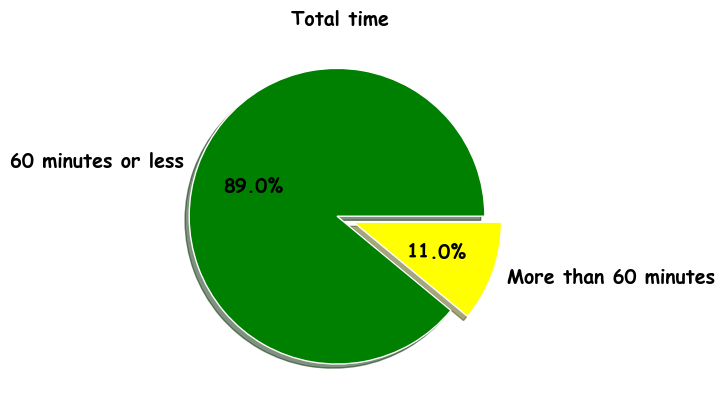

In [142]:
empty = []

for i in df['food_preparation_time'] + df['delivery_time']:
    if i > 60:
        empty.append('More than 60 minutes')
    else:
        empty.append('60 minutes or less')
df['total_cost'] = empty

pie = df['total_cost'].value_counts(normalize=True).round(2)

plt.pie(x=pie,labels=pie.index, explode=[0.02,0.1], autopct = '%0.1f%%',shadow = True, colors=['green', 'yellow'],textprops={'color':'black','weight':'heavy','font':'cursive','size':14})
plt.title('Total time', color='black',weight='heavy',font='cursive', size = 14)
plt.show()

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [143]:
# Group the data by 'day_of_the_week' and calculate the mean delivery time
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

# Print the mean delivery time for weekdays and weekends
print(mean_delivery_time_by_day)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


The Mean of the delivery time on weekdays is greater than that of weekends. This means that, on average, individual deliveries on weekdays tend to take longer compared to individual deliveries on weekends. Even though the total time spent on deliveries may be lower on weekdays, the average delivery time is higher. This could be due to factors such as heavier traffic or higher demand during weekdays, leading to potential delays in delivery.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

__Observation 1__: It is clear that the American cuisine type is the most popular on the weekends followed by the Japanese, Italian, Chinese, Mexican cuisine types.

__Observation 2__: The top restaurant is Shake Shack with over 200 orders placed.

__Observation 3__: The majority of FoodHub orders are placed on the weekends.

### Recommendations

__Recommendation 1 : Weekend Promotions__: We recommend introducing some kind of special promotion, discounts, or limited-time offers for the most popular cuisine type on weekends. This can help drive more orders during weekends and attract customers looking for specific cuisine options.

__Recommendation 2 : Personalized Recommendations__: Utilizing customer order data and feedback to offer personalized recommendations to customers based on their preferences can potentially enhance the customer experience and encourage repeat orders.

__Recommendation 3__ : Restuarants should look into the __'French', 'Southern', 'Korean', 'Spanish', 'Vietnamese' cuisines__ as they were ordered the least (Perhaps something to do with the preparation?). 

__Recommendation 4__ :Not much can be said about the ratings because 700+ customers didnt bother to give ratings, however we recommend maybe giving some __incentives__ to encourage customers to give ratings.